# Naive Bayes

## Write your id numbers and names here


1.   312199698 - Amit Damri
2.   205381684 - Amir Gabay


## 1. Classifying Digits
In this part we will test digits classification on the MNIST dataset, using Bernoulli Naive Bayes (a generative model), in contrast to the Multivariate Logistic Regression (a discriminative model) we used before.

The MNIST dataset contains 28x28 grayscale images of handwritten digits between 0 and 9 (10 classes). For mathmatical analysis clarity, and for matching expected API, each image faltten to create a 1D array with 784 elements.

### Loading the MNIST dataset
Load the MNIST data set. The digits dataset is one of datasets scikit-learn comes with that do not require the downloading of any file from some external website. Use 
```
mnist = sklearn.datasets.fetch_mldata('MNIST original')
```
to fetch the original data. You may set the `data_home` to where you wish to download your data for caching. Each image is already transformed into a 1D integer array $x\in [0,255]^{784}$, and the corresponding label is an integer $y\in [0,9]$.

Plot a single sample of each digit as the original image, so you get a feeling how the data looks like.

Finally, divide your data into train and test sets, using 1/7 of the data for testing.

---
**Note 1:** Using `digits = sklearn.datasets.load_digits()` will only fetch a very small sample of the original set, with images resized to 8x8. This preprocessing of the data reduces dimensionality and gives invariance to small distortions - however, we will use the original data in this exercise. Feel free to test the proformance of the algorithms below on the preprocessed data as well.

**Note 2:**
Since ML-Data is deprecated, you may wish to use something like this:
>```
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(x_train.shape[0], 784)
x_test = x_test.reshape(x_test.shape[0], 784)
```

Using Theano backend.


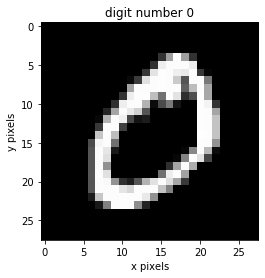

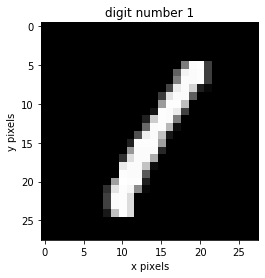

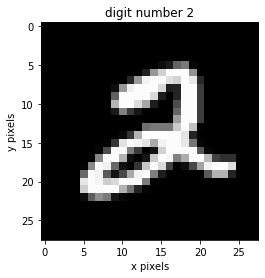

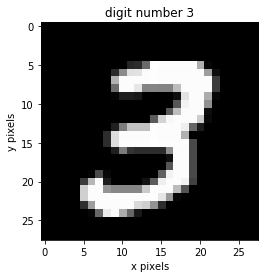

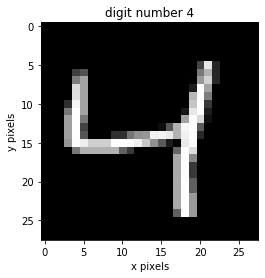

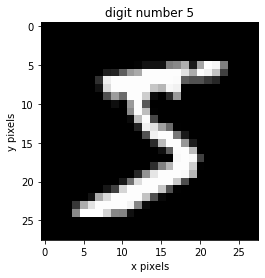

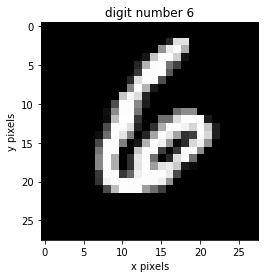

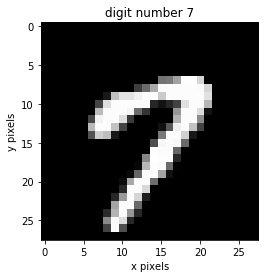

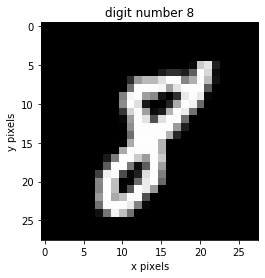

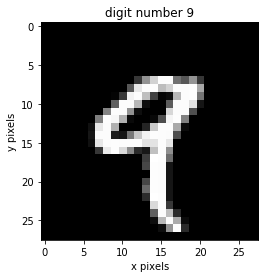

In [1]:
# your code
from matplotlib import pyplot as plt
import numpy as np
from keras.datasets import mnist
import pandas as pd

# get the mnist data - the data already divided into train and test sets using 1/7 of the data for testing. 
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(x_train.shape[0], 784)
x_test = x_test.reshape(x_test.shape[0], 784)

# plot single sample of each digit
def plot_samples():
    # for each digit - plot the digit - digits in range 0-9
    for i in range(0,10):
        
        # find the index of the required digit
        j=0
        while y_train[j] != i:
            j+=1
        
        # plot the digit
        digit_image = x_train[j]
        digit_image = np.array(digit_image, dtype='float')
        pixels = digit_image.reshape((28, 28))
        plt.imshow(pixels, cmap='gray')
        plt.title(f"digit number {i}")
        plt.xlabel("x pixels")
        plt.ylabel("y pixels")
        plt.show()
            
plot_samples()


##### plots explanation 
The white pixels are cells with value different than 0 (1-255), and the black pixels are cells with 0 value. we can see that the white pixels present digits between 0-9.

### Bernoulli Naive Bayes
If we know how the digits are generated, then we know how to classify them (simply choose the digit class which will maximize the posterior probability) --- but which model should we use for describing the digits generation?

In this part we will try a very simplified model of digits creation (which is obviously not the same as the "real" model), using a Naive Bayes over an underlying Bernoulli distribution --- that is, we will assume that given a digit class, the pixels of the images are the result of independent coin flips, each with its own "head" probability.

Note that since we assume each pixl is either 0 (black) or 1 (white), we will need to adjust (preprocess) our data accrodingly (see below).

So, the model is stated as follows:
$$
\begin{align}
\text{Domain} && x \in \{0,1\}^{784} \\
\text{Prior} && \pi_j = \Pr(y=j) \\
\text{Likelihood} && P_j(x) = \Pr(x | y=j) \\
\end{align}
$$

Where for each $i\in 0\ldots 784$ it holds that
$$
P_{ji}(x_i) = \Pr(x_i | y=j) =
\begin{cases}
p_{ji} & \text{if } x_i=1 \\
1-p_{ji} & \text{if } x_i=0 \\
\end{cases}
$$


#### Question 1
Write the classification rule based on this Naive Bayes model. 
How would you esitmate each of the parameters of the model based on the trainning data? 


**Bonus:** Think of edge cases which may effect your estimator in an undesired way.

#### Answer 1
The classification rule is:
$$
c_{NB} = argmax_{j}\pi_j\prod_{i=0}^{N}P_{ji}(x_i)
$$
where N in our case equals 784.

##### Estimations:
prior parameter - we would estimate this parameter from the frequency of classes in the training examples. we would count the number of instances for each class and divide it by the total number of samples. 

p_ji(xi) parameter - we would use the independence assumption that the attribute values are conditionally independent given the target value. we would count the number of instances of feature xi given cj class and divide it by the number of instances of cj class.

Likelihood parameter = with the p_ji(xi) parameters $$ \prod_{i=0}^{N}P_{ji}(x_i) $$

##### Bonus 
when $$ P_{ji}(x_i) $$ equals to zero it may affect the estimator in an undesired way because it would cause the likelihood to become zero too, and that's not correct since the other probabilities may be greater than zero.

#### Question 2
Run a Naive Bayes classifier on the training data and apply predictions on the test data. Use the [sklearn.naive_bayes.BernoulliNB](http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.BernoulliNB.html) implementation (see the [source code for sklearn.naive_bayes](https://github.com/scikit-learn/scikit-learn/blob/master/sklearn/naive_bayes.py) for details).

Remember we need to preprocess the data in this case such that each pixel would become either black (0) or white (1). For this, use the `binarize` parameter of the implementation. Set this value to $0$ (this is the default), which in this case would mean every pixel with non-zero value will be set to 1.

1. Plot the mean image of each class (estimated $\hat{p}_{ji}$) and generate one sample of each class (remember, you can do this since this is a generative model). You will need to access the `feature_log_prob_` attribute of the trained model.

2. Plot the confusion matrix of your classifier, as claculated on the test data (it is recommended to use [sklearn.metrics.confusion_matrix](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)). Calculate the total accuracy (fraction of correctly classified images), and summarize the results in your own words.

3. Think of a way you can find the optimal threshold of the binarization part. **There is no need to actually perform this task --- just describe what you would have done.**


#### Answer 2

******Mean Samples******


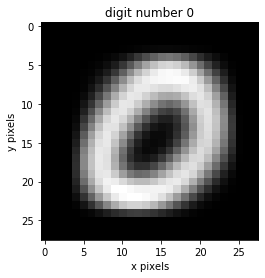

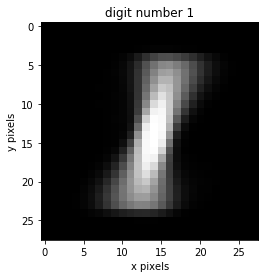

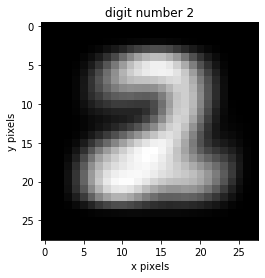

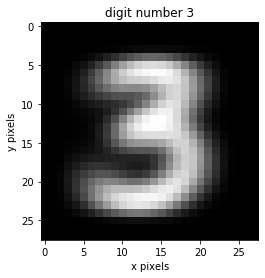

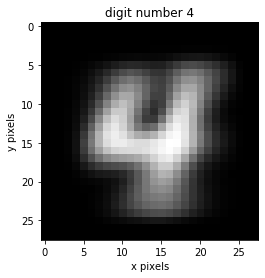

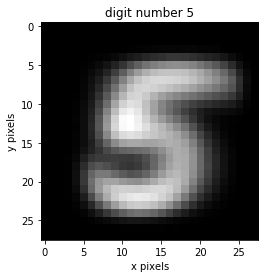

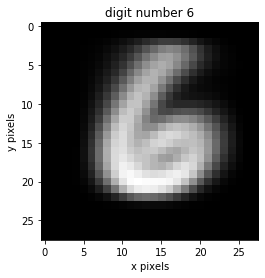

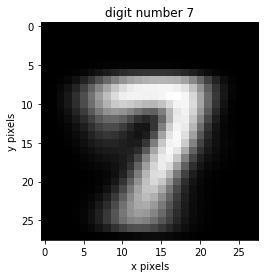

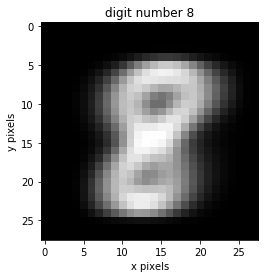

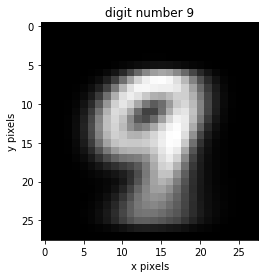

******Generated Sampels******


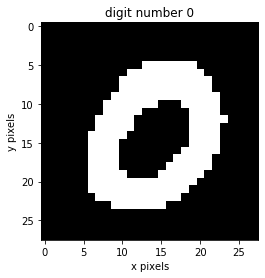

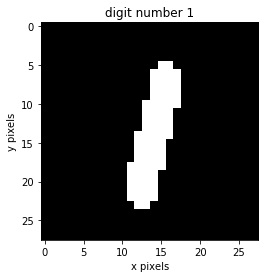

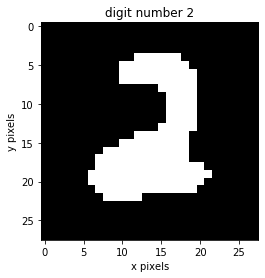

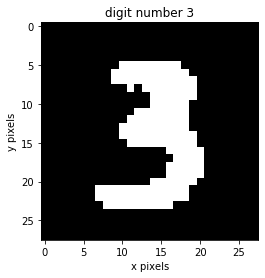

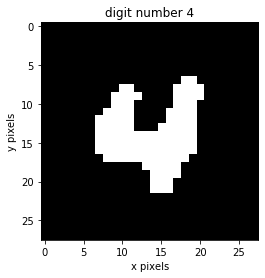

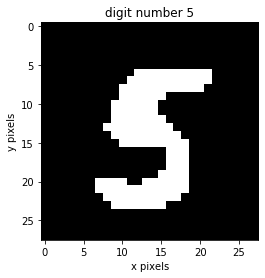

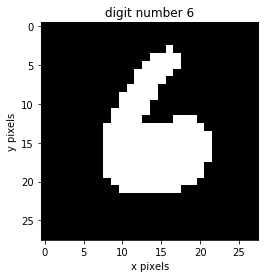

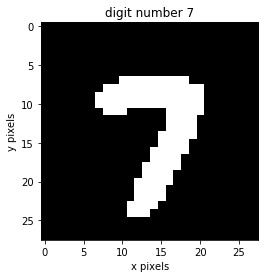

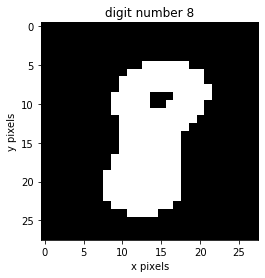

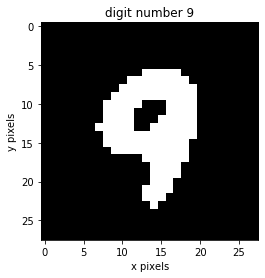

******Confusion Matrix******


array([[ 887,    0,    4,    7,    2,   41,   16,    1,   22,    0],
       [   0, 1085,   10,    5,    0,    9,    6,    0,   19,    1],
       [  19,    8,  852,   29,   17,    4,   32,   14,   55,    2],
       [   5,   15,   34,  844,    0,   13,    9,   15,   49,   26],
       [   2,    6,    4,    0,  795,    4,   21,    1,   23,  126],
       [  23,   12,    7,  129,   30,  627,   16,    8,   21,   19],
       [  18,   18,   15,    2,   13,   35,  851,    0,    6,    0],
       [   1,   24,   14,    4,   15,    0,    0,  871,   27,   72],
       [  16,   23,   13,   76,   17,   22,    7,    6,  758,   36],
       [   9,   13,    5,    9,   74,    8,    0,   24,   24,  843]],
      dtype=int64)

Accuracy: 0.8413


In [2]:
# code goes here
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import confusion_matrix

# plot the mean image of each class
def plot_mean_samples():
    print("******Mean Samples******")
    for digit, features in enumerate(nb.feature_log_prob_):   
        # plot the digit
        plot_digit(np.exp(features),digit)

# generate samples from the naive bayes distribution
def generate_samples():
    print("******Generated Sampels******")
    # generet each digit
    for digit, class_prob in enumerate(nb.feature_log_prob_):
        sample = []
       
        # if the value of the pixel in the feature_log_prob_
        # is greater than log(0.5) then the pixel value is 1,
        # else the value is 0
        for value in class_prob:
            if value >= np.log(0.5):
                sample.append(1)
            else:
                sample.append(0)
        plot_digit(sample, digit)

'''
plot the digits
sample = sample to draw - sequence of 1/0 
digit - the digit number
'''
def plot_digit(sample,digit):
    # plot the digit
    class_image = np.array(sample, dtype='float')
    pixels = class_image.reshape((28, 28))
    plt.imshow(pixels, cmap='gray')
    plt.title(f"digit number {digit}")
    plt.xlabel("x pixels")
    plt.ylabel("y pixels")
    plt.show()

# plot confusion matrix of the model
# return the confusion matrix
def plot_confusion_matrix():
    print("******Confusion Matrix******")
    cm = confusion_matrix(y_test,y_predict)
    display(cm)
    return cm

# calculate the accuracy from the confusion matrix
def calculate_accuracy(cm):
    true_pred = cm.trace() # sum diagonal values 
    total = cm.sum() # sum total values
    accuracy = true_pred / total # calculate accuracy
    print("Accuracy: " + str(accuracy))
    
    
nb = BernoulliNB()
nb.fit(x_train,y_train)
y_predict = nb.predict(x_test) 

plot_mean_samples()
generate_samples()
cm = plot_confusion_matrix()
calculate_accuracy(cm)


##### Summarization of the Results - question 2.2
as we can see from the confusion matrix, the diagonal values present the number of samples that were classified correctly - 8413 samples. the other values present the samples that were classified wrong - 1587. The accuracy of the model is the number of samples that were classified correctly divided by the total number of samples - 84.13%.

##### Answer question 2.3
we can find the optimal threshold of the binarization part with a grid search of the binarize parameter. let's say we are trying the following parameters [0,0.25,0.5,0.75,1], so we choose the best parameter that gives us the best result (the best accuracy) and then we keep searching at the range between this parameter we found and the other one till we got a convergence. 
another option can be by calculating the mean image of each class and to take out a certain percent of pixels that are with the lowest probability. For example, if we have 100 pixels, so we will take the 10th highest number and this number will be the threshold.

## 2. Classifing Text Documents using Multinomial Naive Bayes
In this exercise you will classify the "20 newsgroups" data set using your own naive bayes classifier and compare to the scikit learn built in version.

The 20 newsgroups dataset comprises around 18000 newsgroups posts on 20 topics split in two subsets: one for training (or development) and the other one for testing (or for performance evaluation). The split between the train and test set is based upon messages posted before and after a specific date.

### You task
Implement the barebone class provided: `NaiveBayes(BaseEstimator, ClassifierMixin)` and implement its `fit`, `predict` and `predict_proba` methods.

Then follow next anlysis guidlinnes using the implemented class for train and test classifier:
* Load the **train** data using `from sklearn.datasets import fetch_20newsgroups`. remove headers, footers and quotes (see documentation)
* Use `sklearn.feature_extraction.text import CountVectorizer` to count words (stop_words='english')
* use `sklearn.pipeline.make_pipeline` to chain the vectroizer and model.
* note: limit the vocuabolary size if you suffer memory issues
* compare the accuracy over the **test** data. You can use `accuracy_score, classification_report`
* compare to the built in `sklearn.naive_bayes.MultinomialNB`
* compare to `TfidfVectorizer` preprocessing (you can use the built in model for doing the analysis)
* plot the learning curve - is the model in the bias or variance regime (you can use the built in model for doing the analysis)
* optimize performance in respect to vectorizer hyper parameters (e.g. max_features, max_df etc.).


In [3]:
#Classifing Text Documents using Multinomial Naive Bayes

from sklearn.base import BaseEstimator, ClassifierMixin
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
from numpy import ma


class NaiveBayes(BaseEstimator, ClassifierMixin):
    
    # Fit Naive Bayes classifier according to X, y
    def fit(self, x, y):
        
        self.classes_ = list(set(y)) # get classes
        self.n_features_ = x.get_shape()[1] # get number of features/columns
               
        # count number of instances from each class and calculate distibutions
        self.class_count_ = pd.Index(y).value_counts()
        
        self.class_count_.sort_index(inplace=True) #sort according to classes order 
        
        # divide the number of instance for each class by the total number of samples
        self.class_log_prior_ = np.log(np.divide(self.class_count_,len(y))) 
        
        # get class indices 
        classes_indices = [[index for index,x in enumerate(y) if x == class_] for class_ in self.classes_]
       
        # count the total number of times feature  appears in a class 
        temp = []
        for indices in classes_indices:
            feature_class = x[indices,:].sum( axis=0 )
            temp.append(feature_class.A1)
            
        self.feature_count_ = np.array(temp , dtype='float')     
        
        # count the total number of times <b>all<b> features appears in a class
        total_features_class = self.feature_count_.sum(axis=1)
        
        # smoothed version of maximum likelihood - laplace
        lap_deno = total_features_class[:,None] + 1 * self.n_features_
        lap_nom = self.feature_count_ + 1
        self.feature_log_prob_ = np.log( lap_nom / lap_deno )
    
    # Return log-probability estimates for the test vector X.
    def predict_log_proba(self, x):
        results = self.class_log_prior_[:, None].T + x.dot(self.feature_log_prob_.T)
        return results
    
    # Perform classification on an array of test vectors X.
    def predict(self, x):
        # multinomial classifier function
        results = self.class_log_prior_[:, None].T + x.dot(self.feature_log_prob_.T)
        return results.T.argmax( axis=0 ) # get the maximum class index for each sample
  
# load  data
newsgroups_train = fetch_20newsgroups(subset='train',remove= ('headers', 'footers', 'quotes'))
newsgroups_test = fetch_20newsgroups(subset='test',remove= ('headers', 'footers', 'quotes'))

# Our Naive bayes model
pipline_naive = make_pipeline(CountVectorizer(stop_words='english'), NaiveBayes())
pipline_naive.fit(newsgroups_train['data'],newsgroups_train['target'])
print(f"NaiveBayes Accuracy: { pipline_naive.score(newsgroups_test['data'], newsgroups_test['target']) }")

# Build in MultinomialNB model
pipline_multi = make_pipeline(CountVectorizer(stop_words='english'), MultinomialNB())
pipline_multi.fit(newsgroups_train['data'],newsgroups_train['target'])
print(f"MultinomialNB Accuracy: { pipline_multi.score(newsgroups_test['data'],newsgroups_test['target']) }")

# Build in MultinomialNB model + TfidfVectorizer
pipline_tfidf = make_pipeline(TfidfVectorizer(stop_words='english'), MultinomialNB())
pipline_tfidf.fit(newsgroups_train['data'],newsgroups_train['target'])
print(f"MultinomialNB + TfidfVectorizer Accuracy: {pipline_tfidf.score(newsgroups_test['data'],newsgroups_test['target'])}")



NaiveBayes Accuracy: 0.6343600637280935
MultinomialNB Accuracy: 0.6343600637280935
MultinomialNB + TfidfVectorizer Accuracy: 0.6779075942644716


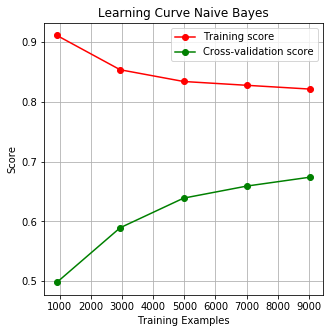

In [4]:
#plot learning curve

# plot the learning curve
def plot_learning_curve(lc):
    
    # get parameters from lc = learning curve
    train_sizes = lc[0]
    train_scores = lc[1]
    test_scores = lc[2]
    
    # mean the scores 
    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    
    # Plot learning curve
    plt.figure(figsize=(5, 5))
    plt.title("Learning Curve Naive Bayes")
    plt.ylabel("Score")
    plt.xlabel("Training Examples")
    plt.grid()
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    plt.legend()
    plt.show()
 
lc = learning_curve(
        pipline_multi, newsgroups_train.data, newsgroups_train.target, cv=5)
plot_learning_curve(lc)

#### Learning Curve Explanation
As we can see, the model is in the variance regime because the gap between the training score and the cross validation score is wide. (high variance, low bias)

In [5]:
#Optimization - 
# min_df=2
pipline_multi_opt1 = make_pipeline(CountVectorizer(stop_words='english',min_df=2),
                                   MultinomialNB())
pipline_multi_opt1.fit(newsgroups_train['data'],newsgroups_train['target'])
print(f"MultinomialNB1 Accuracy: { pipline_multi_opt1.score(newsgroups_test['data'],newsgroups_test['target']) }")

#max_features = 30000
pipline_multi_opt2 = make_pipeline(CountVectorizer(stop_words='english',max_features=30000),
                                   MultinomialNB())
pipline_multi_opt2.fit(newsgroups_train['data'],newsgroups_train['target'])
print(f"MultinomialNB2 Accuracy: { pipline_multi_opt2.score(newsgroups_test['data'],newsgroups_test['target']) }")

# max_df=500
pipline_multi_opt3 = make_pipeline(CountVectorizer(stop_words='english',max_df=500),
                                   MultinomialNB())
pipline_multi_opt3.fit(newsgroups_train['data'],newsgroups_train['target'])
print(f"MultinomialNB3 Accuracy: { pipline_multi_opt3.score(newsgroups_test['data'],newsgroups_test['target']) }")

# max_df=500, min_df=2, max_features=30000
pipline_multi_opt4 = make_pipeline(CountVectorizer(stop_words='english',min_df=2,max_features=30000,max_df=500),
                                   MultinomialNB())
pipline_multi_opt4.fit(newsgroups_train['data'],newsgroups_train['target'])
print(f"MultinomialNB4 Accuracy: { pipline_multi_opt4.score(newsgroups_test['data'],newsgroups_test['target']) }")


MultinomialNB1 Accuracy: 0.6510886882634095
MultinomialNB2 Accuracy: 0.6524163568773235
MultinomialNB3 Accuracy: 0.6468401486988847
MultinomialNB4 Accuracy: 0.659984067976633



### Bonus I (10 points)
#### Model interpretability
Find the most important features for a **specific** decision of a NB classifier.
Because the model has learned the prior $p(x_i|c)$ during the training, the contribution of an individual feature value can be easily measured by the posterior, $p(c|x_i)=p(c)p(x_i|c)/p(x_i)$
Implement a function which gets a scikit-learn NB model as input and returns $P(c|x_i)$:

`def calc_p_c_given_xi(model)`

Hint: Use the following model properties:

* `model.class_log_prior_`
* `model.feature_log_prob_`

Note: remember these are logs and you need to use np.exp and normalize to get $P(c|x_i)$ 
Another hint: use numpy built-in broadcasting property.

* Use the interpretation to examine errors of the classifier where $\hat{c}\ne c$. Which top words support the correct class and which support the wrong class? You can use the `print_txt` below to color words.

In [6]:
import string
def print_txt(txt, hot, cold):
  """
  print the text, coloring hot and cold words with colors
  """
  cold_color='\x1b[41;37m{}\x1b[0m'
  hot_color='\x1b[42;37m{}\x1b[0m'
  mid_color='\x1b[45;37m{}\x1b[0m'
  
  def color(token):
    lower = str(token).lower()
    lower = lower.replace('\t','').replace('\n','')
    lower = lower.translate(string.punctuation)
    if (lower in hot) and (lower in cold):
      return mid_color.format(token)
    elif lower in hot:
      return hot_color.format(token)
    elif lower in cold:
      return cold_color.format(token)
    else:
      return token
  colored_txt = " ".join([color(token) for token in txt.split(' ')])
  print(colored_txt)
print_txt('This word support the first class but this the other', ['word'],['other'])

This word support the first class but this the other


In [7]:
# Implementationn for 1st bonus

# calc the posterior - p(c) * p(c|xi) / p(xi)
def calc_p_c_given_xi(model):
    
    class_prior = np.exp(model.class_log_prior_)
    feature_prob = np.exp(model.feature_log_prob_)
    nominator = class_prior.reshape(-1,1) * feature_prob
    p_xi  = nominator.sum(axis=0)
    p_c_given_xi = nominator / p_xi
    return p_c_given_xi

# intepretation only for the 10 first docs 
def interpretation(model):
    index = 0
    for prediction, expected, text in zip(predictions, newsgroups_test['target'], newsgroups_test['data']):         
        
        if index >=10: # iterate only over 10 docs
            break
        
        if prediction != expected:
            print(f"Document number {index}:\n")
            words_indices = model[index,:].nonzero()[1] # get non zero words indices of the current document
            hot = word_scores(expected, words_indices).word.tolist() # get top 20 words that support correct class            
            cold = word_scores(prediction, words_indices).word.tolist() # get top 20 words that support wrong class
            print_txt(text, hot, cold)
        
        index+=1 # next doc
        
# rate the words and return top score words        
def word_scores(class_, word_indices, min_p=0.1, max_n = 20):
   
    word_score = p_c_given_xi[class_, word_indices] # distributions of c given xi
    words =[pipline_multi['countvectorizer'].get_feature_names()[word_index] for word_index in word_indices] # get words by indices
    
    # create series while the indices are (word,index) and the value is word_score
    s = pd.Series(word_score.flatten(), index=[words, word_indices]) 
    s.index.names=['word','idx']
    s.name = 'score'
    
    stop = s.sort_values(ascending=False) # sort in order to get top 20
    stop = stop[stop>min_p] # get only words with score greater than min_p=0.1
    if len(stop)>max_n: # if there are more than 20 words take only the top max_n=20
        stop = stop[:max_n]
    return stop.reset_index() # remove indices of (word,index) in order to use regular indices
    
p_c_given_xi = calc_p_c_given_xi(pipline_multi["multinomialnb"])
predictions = pipline_multi.predict(newsgroups_test['data'])
interpretation(pipline_multi['countvectorizer'].transform(newsgroups_test['data']))



Document number 1:

I'm not familiar at all with the format of these "X-Face:" thingies, but
after seeing them in some folks' headers, I've *got* to *see* them (and
maybe make one of my own)!

I've got "dpg-view" on my Linux box (which displays "uncompressed X-Faces")
and I've managed to compile [un]compface too... but now that I'm *looking*
for them, I can't seem to find any X-Face:'s in anyones news headers!  :-(

Could you, would you, please send me your "X-Face:" header?

I *know* I'll probably get a little swamped, but I can handle it.

	...I hope.
Document number 2:


In a word, yes.

Document number 4:


I've just spent two solid months arguing that no such thing as an
objective moral system exists.
Document number 7:

A friend of mine managed to get a copy of a computerised Greek and Hebrew 
Lexicon called "The Word Perfect" (That is not the word processing 
package WordPerfect). However, some one wiped out the EXE file, and she 
has not been able to restore it. There are no di

### Bonus II (5 points)
#### How can you correct the analyzed error?

To read more about model interpretation, see the blogpost below and the tutorial:
* https://lilianweng.github.io/lil-log/2017/08/01/how-to-explain-the-prediction-of-a-machine-learning-model.html
* https://github.com/chanansh/right_but_why

##### Answer for 2nd bonus

we can find an explanation for the classification - find the features that affect the classification at most and if the classification was wrong we can remove those features and the prediction should move towards the opposite class (the correct class).